In [1]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import pandas as pd, numpy as np
import matplotlib as mpl
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
import joblib
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, roc_curve,precision_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from imblearn.ensemble import RUSBoostClassifier,BalancedRandomForestClassifier #63 84
from imblearn.ensemble import BalancedBaggingClassifier #69 74
from sklearn.metrics import make_scorer, f1_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, RUSBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import OneSidedSelection
from collections import Counter
from imblearn.combine import SMOTEENN
from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTEN
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import StratifiedKFold
import shap
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.svm import SVC
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder


In [3]:
# mpl.rcParams['font.sans-serif']=['SimHei']
# mpl.rcParams['axes.unicode_minus']=False
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']


In [2]:
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/V2/csv/2017科技人员心理健康调查-最近一周自杀意念-Item信息数据.csv"
Dataset = pd.read_csv(fpath)
# corr_matrix = Dataset.corr()

# sns.heatmap(corr_matrix, annot=True)


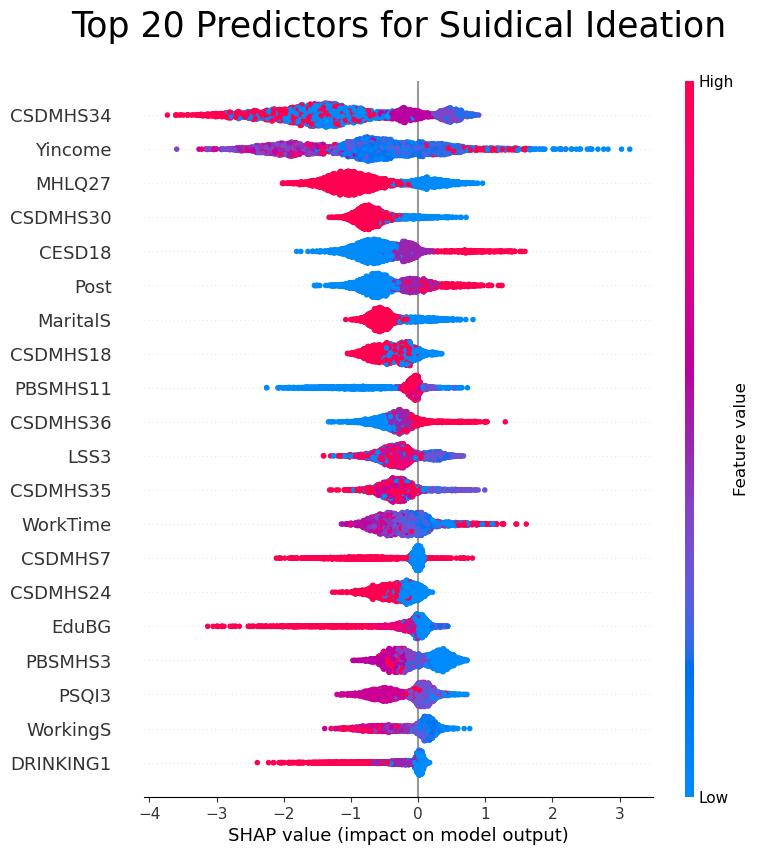

       feature  importance
98    CSDMHS34    1.294562
6      Yincome    1.002781
62      MHLQ27    0.838842
94    CSDMHS30    0.662948
21      CESD18    0.580248
3         Post    0.486247
8     MaritalS    0.476008
82    CSDMHS18    0.390976
51    PBSMHS11    0.381604
100   CSDMHS36    0.355323
38        LSS3    0.354175
99    CSDMHS35    0.350173
104   WorkTime    0.346645
72     CSDMHS7    0.325032
88    CSDMHS24    0.324526
1        EduBG    0.317952
43     PBSMHS3    0.315676
33       PSQI3    0.308757
4     WorkingS    0.302799
12   DRINKING1    0.289596


In [11]:
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/V2/csv/2017科技人员心理健康调查-最近一周自杀意念-Item信息数据.csv"
Dataset = pd.read_csv(fpath)
y = Dataset['suicide']
x = Dataset.drop(labels=['suicide','CSDMHS17'], axis=1)

feature_names = np.array(x.columns)
names = x.columns
names = list(names)
key = list(range(0, len(names)))
names_dict = dict(zip(key, names))
names_dicts = pd.DataFrame([names_dict])
random_state = 42

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)
smote = SMOTEENN(random_state=random_state)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# rfc = RandomForestClassifier(n_estimators=100,max_depth=30,min_samples_leaf=2,min_samples_split=2,random_state=random_state)
rfc = xgb.XGBClassifier(n_estimators=100,max_depth=6,scale_pos_weight=40,seed=1)

rfc.fit(x_train_resampled, y_train_resampled)
# 使用内联模式显示图像
%matplotlib inline

explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(x_test)

class_names = [
     'No Suicidal Ideation',
     'Suicidal Ideation'
]
plt.subplots()
shap.summary_plot(shap_values, x_test, feature_names=feature_names, class_names=class_names,max_display=20,plot_size=(8, 8),show=False)
plt.title('Top 20 Predictors for Suidical Ideation', fontsize = 25, y = 1.05)
plt.show()
plt.close()
importances = np.abs(shap_values).mean(0)
# Match feature names with their respective importances
feature_importances = pd.DataFrame(list(zip(x_test.columns, importances)), 
                                   columns=['feature', 'importance'])
# Sort the DataFrame by importance in descending order
feature_importances.sort_values(by='importance', ascending=False, inplace=True)
print(feature_importances[:20])


重采样后的类别分布： Counter({1.0: 6150, 0.0: 5564})
weight:28.30597014925373
预测数据: Counter({0.0: 3269, 1.0: 97})
              precision    recall  f1-score   support

         0.0       0.99      0.82      0.90      3269
         1.0       0.12      0.86      0.22        97

    accuracy                           0.82      3366
   macro avg       0.56      0.84      0.56      3366
weighted avg       0.97      0.82      0.88      3366

Recall: 0.82 Accuracy: 82.20


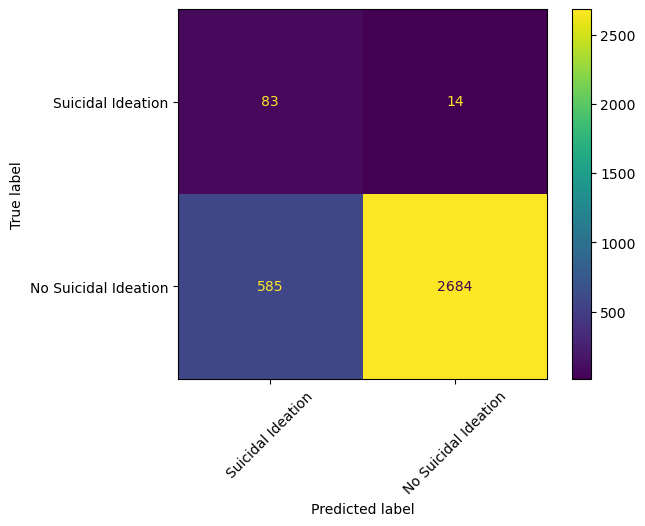

F1:  0.8799430537992629
Accuracy:  0.9834399248009861
Precision:  0.9987012980595729
Recall:  0.9697560975609756
F1 score:  0.9830051177306789


In [7]:
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/V2/csv/2017科技人员心理健康调查-最近一周自杀意念-Item信息数据.csv"
Dataset = pd.read_csv(fpath)
y = Dataset['suicide']
x = Dataset.drop(labels=['suicide','CSDMHS17'], axis=1)
random_state=42

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)

# 过采样
smote = SMOTEENN(random_state=random_state)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
print("重采样后的类别分布：", Counter(y_train_resampled))
weights = np.sum(y_train == 0) / np.sum(y_train == 1)
print("weight:" + str(weights))
# rfc = RandomForestClassifier(class_weight={0:1, 1:weights},n_estimators=50,min_samples_leaf=2,min_samples_split=2,random_state=random_state)
# rfc = xgb.XGBClassifier(n_estimators=100,max_depth=6,learning_rate=0.1,scale_pos_weight=40,seed=1)
rfc = BalancedRandomForestClassifier(n_estimators=100, random_state=42)

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

print("预测数据:", Counter(y_test))
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Recall: %.2f' % recall,'Accuracy: %.2f' % (accuracy*100))
# 绘制混淆矩阵

label_dict = {
    1: 'Suicidal Ideation',
    0: 'No Suicidal Ideation'
}
y_test_text = [label_dict[label] for label in y_test]
y_pred_text = [label_dict[label] for label in y_pred]
cm_text = confusion_matrix(y_test_text, y_pred_text, labels=list(label_dict.values()))

disp_text = ConfusionMatrixDisplay(confusion_matrix=cm_text, display_labels=list(label_dict.values()))
disp_text.plot()
plt.xticks(rotation=45)
plt.show()


print('F1: ', f1)
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Perform 5-fold cross-validation on the model

cv_results = cross_validate(rfc,x_train_resampled, y_train_resampled, cv=5, scoring=scoring)

# Print the average score for each metric
print("Accuracy: ", cv_results['test_accuracy'].mean())
print("Precision: ", cv_results['test_precision'].mean())
print("Recall: ", cv_results['test_recall'].mean())
print("F1 score: ", cv_results['test_f1'].mean())




原始数据集类别分布： Counter({0.0: 10855, 1.0: 365})
重采样后的类别分布： Counter({1.0: 6150, 0.0: 5564})
特征重要性：
    feature_name  importance
62        MHLQ27    0.057045
94      CSDMHS30    0.052822
21        CESD18    0.040411
99      CSDMHS35    0.038012
18        CESD12    0.033368
20        CESD16    0.027469
38          LSS3    0.025262
100     CSDMHS36    0.025109
51      PBSMHS11    0.025060
37          LSS2    0.025000
27          GAD5    0.023513
8       MaritalS    0.022135
29          GAD7    0.020704
14         CESD3    0.020320
17         CESD7    0.020307
6        Yincome    0.019189
98      CSDMHS34    0.017992
104     WorkTime    0.017848
19        CESD14    0.017195
68       CSDMHS3    0.015881
16         CESD6    0.015788
63        MHLQ29    0.015721


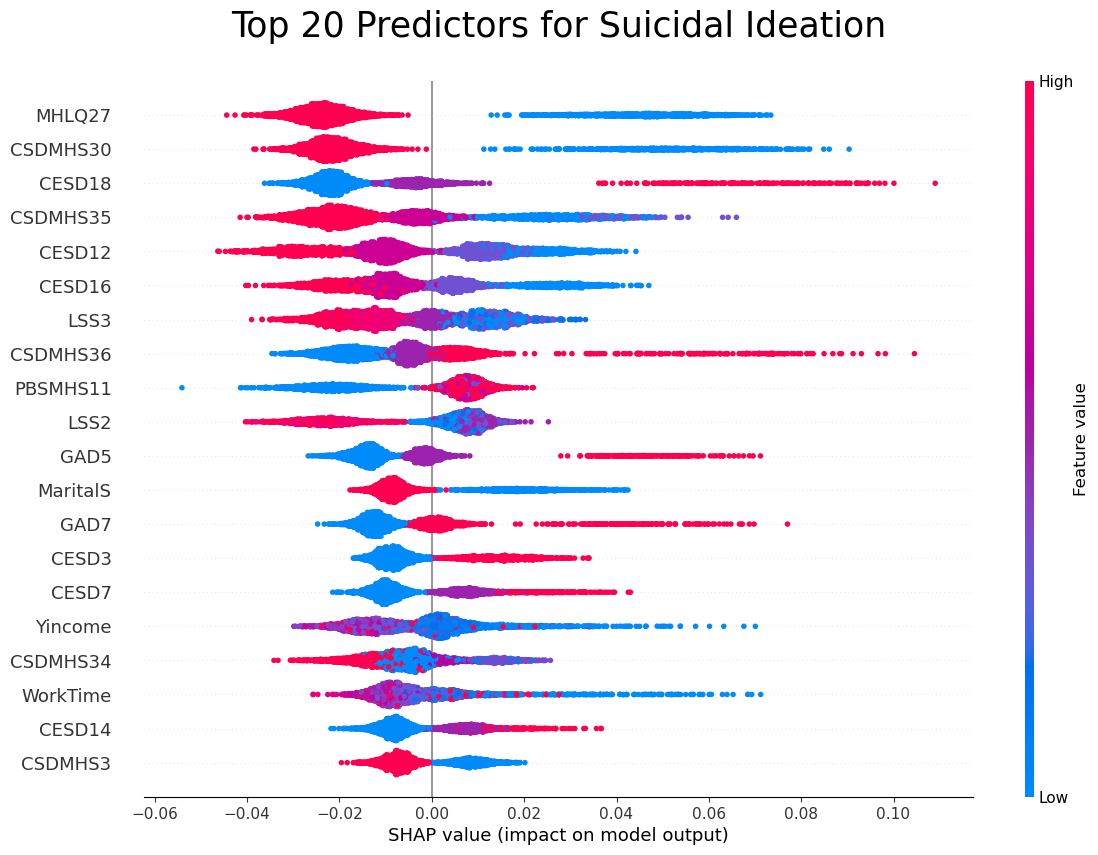

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap

fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/V2/csv/2017科技人员心理健康调查-最近一周自杀意念-Item信息数据.csv"

Dataset = pd.read_csv(fpath)
number = 15
random_state = 42

y = Dataset['suicide']
X = Dataset.drop('suicide', axis=1)
print('原始数据集类别分布：', Counter(y))

feature_names = np.array(x.columns)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)
x_train = pd.DataFrame(x_train, columns=feature_names)
x_test = pd.DataFrame(x_test, columns=feature_names)
smote = SMOTEENN(random_state=random_state)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
print("重采样后的类别分布：", Counter(y_train_resampled))

rfc = BalancedRandomForestClassifier(n_estimators=100, random_state=random_state)

rfc.fit(x_train, y_train)

explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(x_test)

# 计算特征重要性
feature_importance = np.sum([np.abs(class_shap_values).mean(axis=0) for class_shap_values in shap_values], axis=0)

feature_importance_df = pd.DataFrame(
    {'feature_name': feature_names, 'importance': feature_importance}
)

# 按特征重要性降序排序
sorted_feature_importance_df = feature_importance_df.sort_values(
    by='importance', ascending=False
)
top_features = sorted_feature_importance_df.head(22)

print("特征重要性：")
print(top_features)

class_names = [
     'No Suicidal Ideation',
     'Suicidal Ideation'
     
]
# plt.subplots()
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values[1], x_test,plot_size=(12, 8), max_display=20, plot_type='dot',show=False)
plt.title('Top 20 Predictors for Suicidal Ideation', fontsize = 25, y = 1.05)
plt.show()
# for i, class_name in enumerate(class_names):
#     plt.figure() 
#     shap.summary_plot(shap_values[i], x_test, max_display=20, plot_size=(12, 8), show=False, plot_type='dot')
#     plt.title(f'SHAP values for {class_name}') # Add title here
#     plt.show() # Show plot here
# 绘制SHAP总结图
# shap.summary_plot(shap_values, x_test, max_display=20,class_names=class_names, plot_size=(12, 8),show=False, plot_type='bar')
# plt.title('Top 20 Predictors for Suicidal Ideation', fontsize = 25, y = 1.05)
# plt.show()

plt.close()